# Predicting vigilance using machine learning
## Random Forest Model 3
Rosalie Lucas (6540384)

This is the third model in my thesis Predicting vigilance using machine learning.
In this model temperature measures, subjective measures and demographic data will be used.


In [1]:
# Import Libraries needed
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Installed Graphviz using Pip3

In [2]:
data_file_path = '/Users/roos/Data/all_trials_noNaN2.csv'
data_file = pd.read_csv(data_file_path)
data_3 = data_file[[ 'Age', 'Gender', 'PSQI', 'MEQ_type', '9A00000045146841',
       'F9000000452CCF41', '76000000452C9741', '7200000045201D41', '4B0000004516B141', 'CB000000452D7441', 'DPG_finger-chest',
       'DPG_nose-forehead', 'DPG_pinna-mastoid', 'results', 'FLIR_forehead', 'FLIR_nose', 'FLIR_DPG_nose-forehead']]


In [3]:
# Encode categorical variables
# Gender
encoder = LabelEncoder()
label_encoder_gender = encoder.fit(data_3['Gender'])
print("gender classes:", label_encoder_gender.classes_)
integer_classes_gender = label_encoder_gender.transform(label_encoder_gender.classes_)
print("Gender integer classes", integer_classes_gender)
code = label_encoder_gender.transform(data_3['Gender'])
data_3['Gender'] = code

# MEQ_type
label_encoder_MEQ = encoder.fit(data_3['MEQ_type'])
print("MEQ classes:", label_encoder_MEQ.classes_)
integer_classes_MEQ = label_encoder_MEQ.transform(label_encoder_MEQ.classes_)
print("MEQ> integer classes", integer_classes_MEQ)
code_MEQ = label_encoder_MEQ.transform(data_3['MEQ_type'])
data_3['MEQ_type'] = code_MEQ

gender classes: ['female' 'male']
Gender integer classes [0 1]
MEQ classes: ['evening' 'intermediate' 'morning']
MEQ> integer classes [0 1 2]


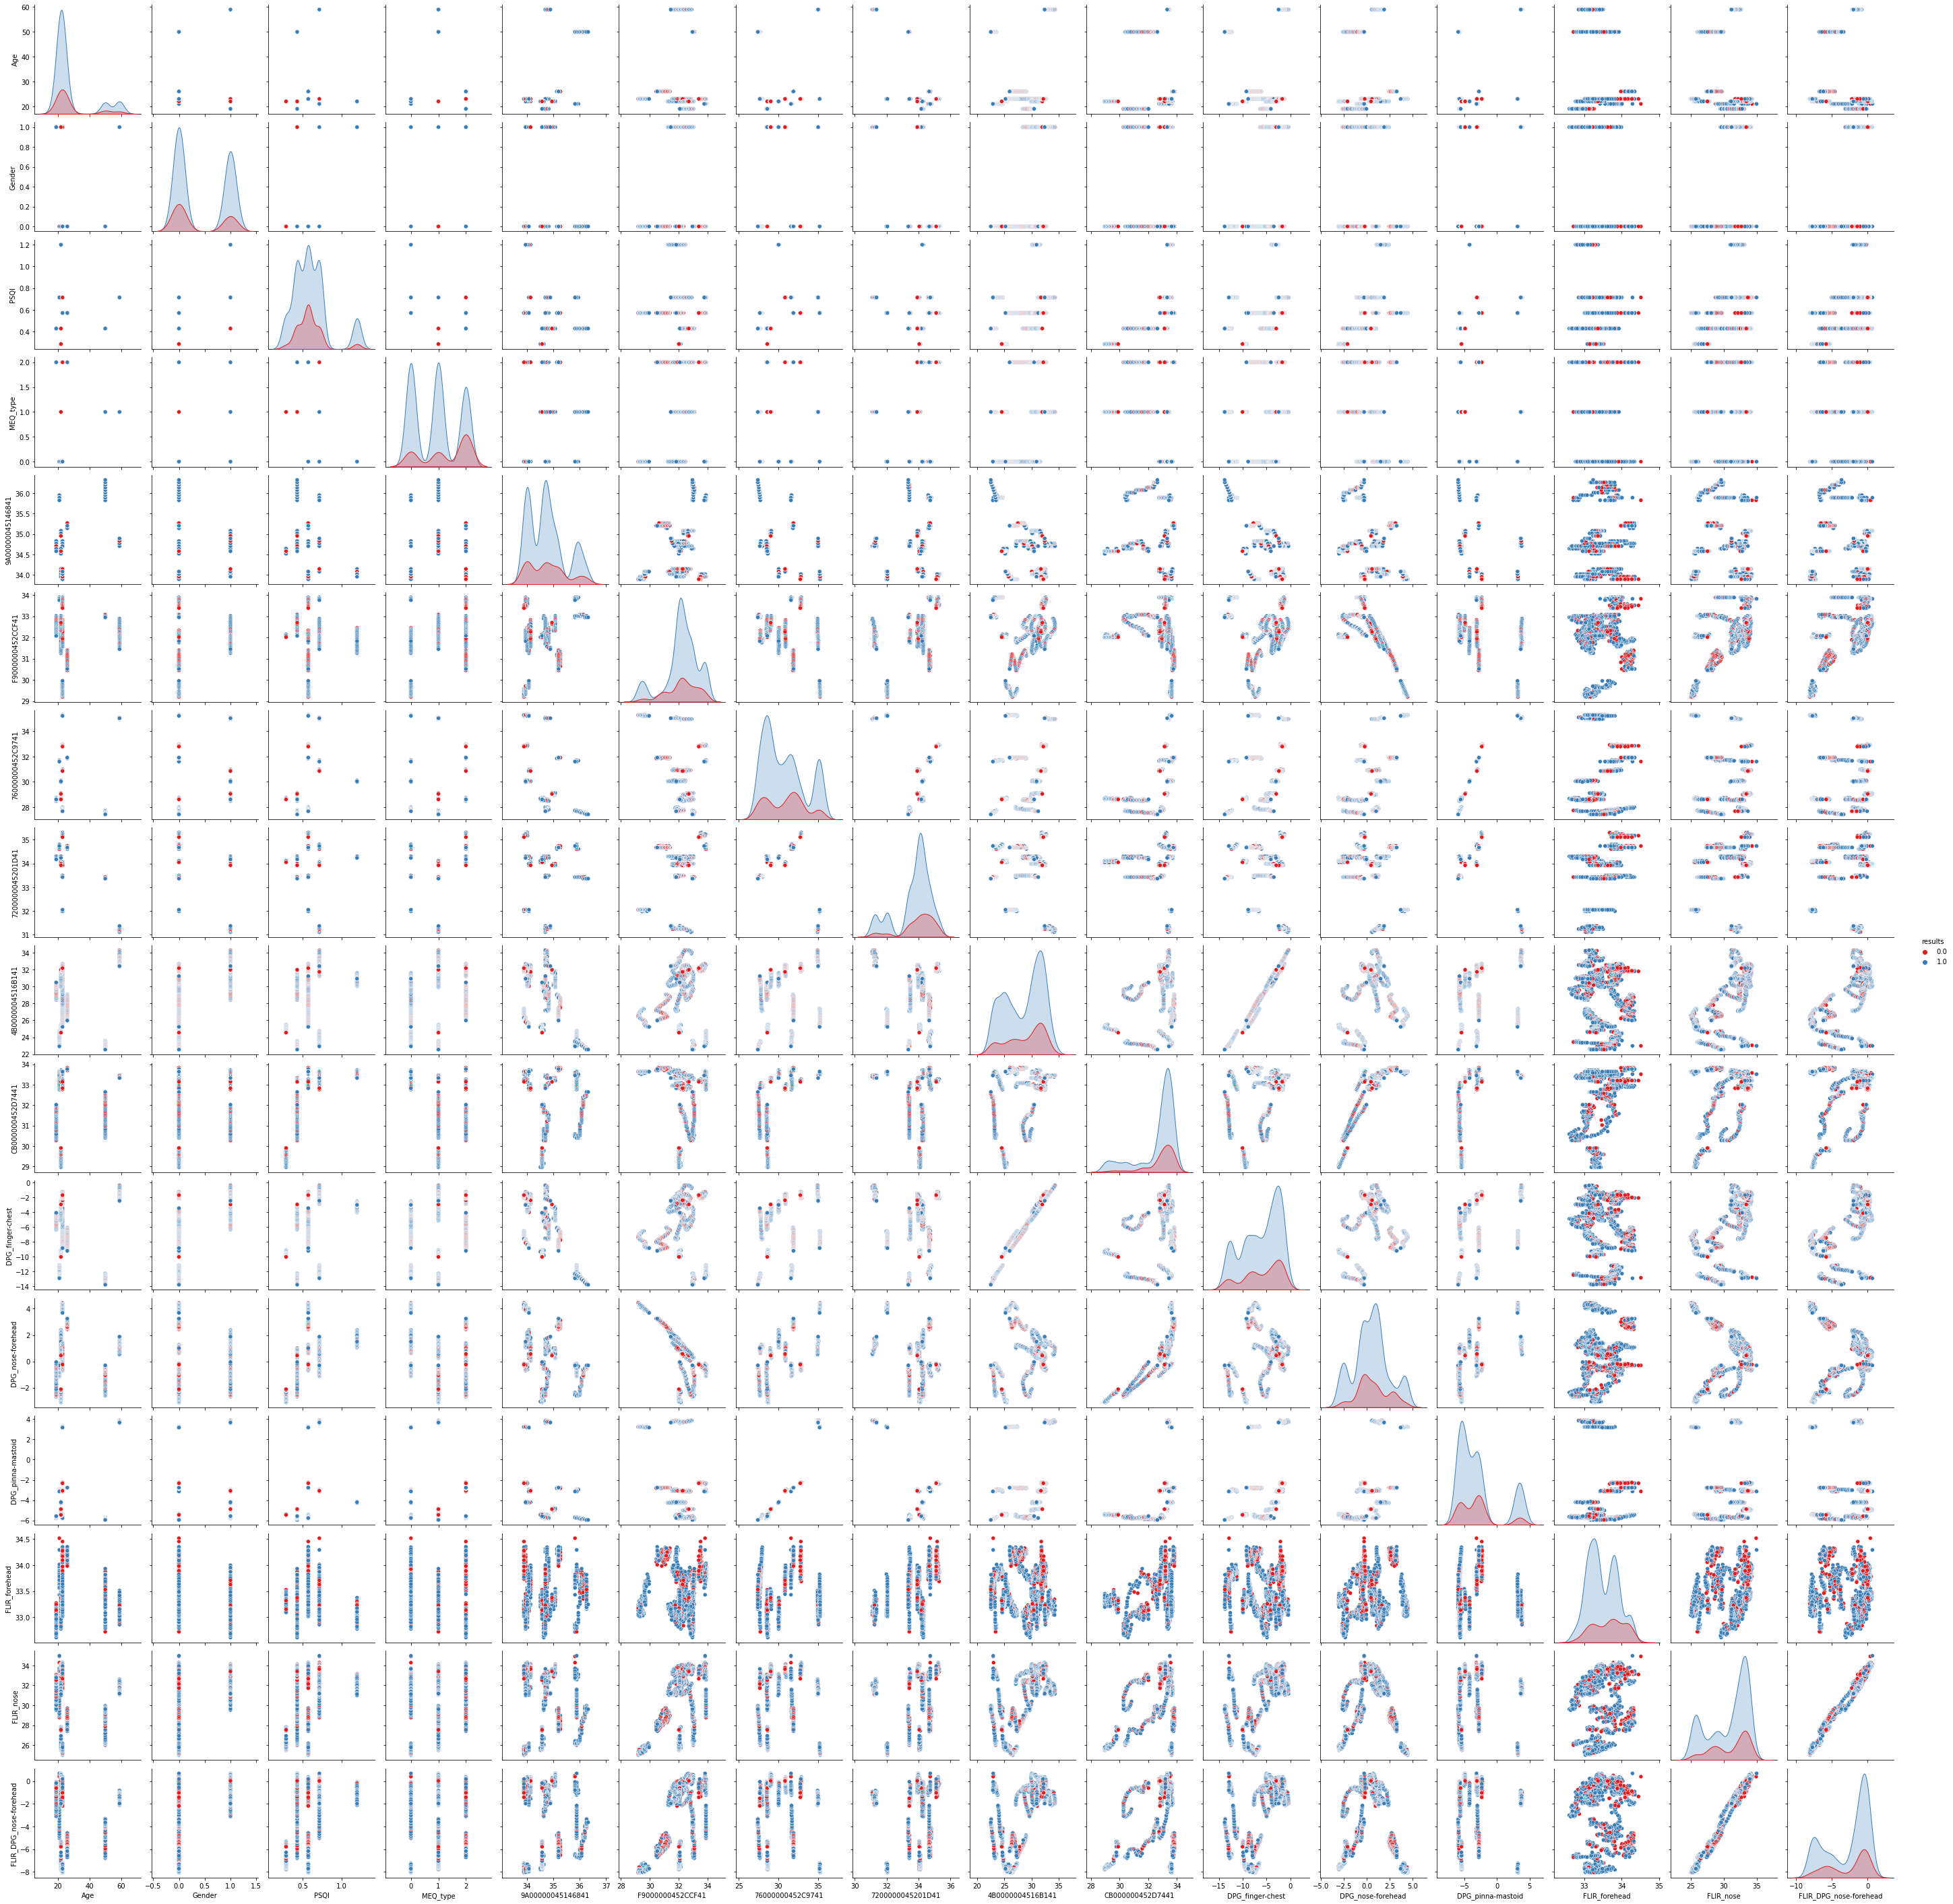

In [4]:
plot = sns.pairplot(data_3, hue='results', palette="Set1")

In [5]:
for column in data_3:  # Describe the amount of different features in each column (column is a feature)
    unique_values = np.unique(data_3[column])
    number_values = len(unique_values)
    if number_values < 12:
        print("The number of values for feature {} : {} -- {}".format(column, number_values, unique_values))
    else:
        print("The number of values for feature {} : {}".format(column, number_values))

print(data_3.isnull().sum())

The number of values for feature Age : 7 -- [19 21 22 23 26 50 59]
The number of values for feature Gender : 2 -- [0 1]
The number of values for feature PSQI : 5 -- [0.28571429 0.42857143 0.57142857 0.71428571 1.2       ]
The number of values for feature MEQ_type : 3 -- [0 1 2]
The number of values for feature 9A00000045146841 : 27
The number of values for feature F9000000452CCF41 : 65
The number of values for feature 76000000452C9741 : 38
The number of values for feature 7200000045201D41 : 25
The number of values for feature 4B0000004516B141 : 187
The number of values for feature CB000000452D7441 : 73
The number of values for feature DPG_finger-chest : 366
The number of values for feature DPG_nose-forehead : 235
The number of values for feature DPG_pinna-mastoid : 63
The number of values for feature results : 2 -- [0. 1.]
The number of values for feature FLIR_forehead : 1716
The number of values for feature FLIR_nose : 1716
The number of values for feature FLIR_DPG_nose-forehead : 171

In [6]:
# Splitting the data
X = data_3.drop('results', axis=1).values
Y = data_3['results'].values
print('X shape: {}'.format(np.shape(X)))
print('Y shape: {}'.format(np.shape(Y)))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

X shape: (1716, 16)
Y shape: (1716,)


In [7]:
dt = DecisionTreeClassifier(max_depth=3, random_state=0)
dt.fit(X_train, Y_train)
print(Y_test.sum()/len(Y_test))
print(Y_train.sum()/(len(Y_train)))

0.7645348837209303
0.7798833819241983


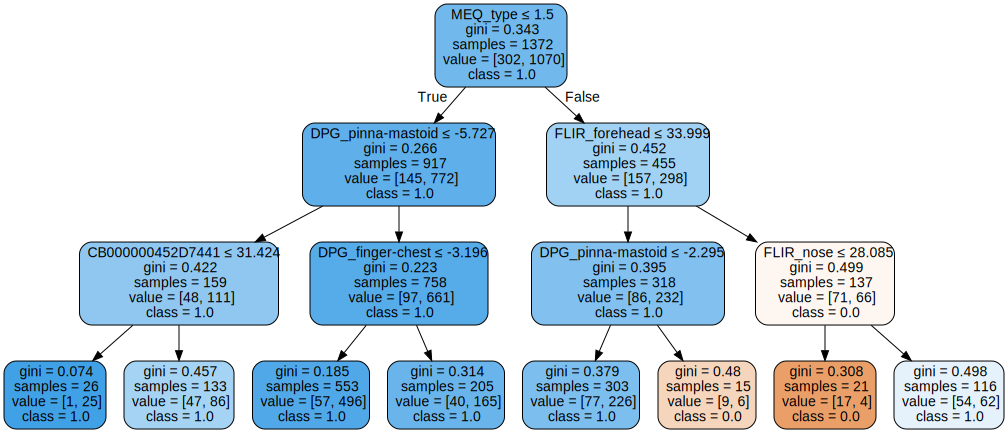

In [8]:
import graphviz

dot_data =  tree.export_graphviz(dt, out_file=None,
                                   feature_names=data_3.drop('results', axis=1).columns,
                                   class_names=['0.0', '1.0'],
                                   filled=True, rounded=True,
                                   special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('model3.gv', view=True)
graph

In [9]:
final = ''
fi = ''
for i, column in enumerate(data_3.drop('results', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))

    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})

    try:
        final = pd.concat([final, fi], ignore_index=True)
    except:
        final = fi

# Ordering the data
final_fi = final.sort_values('Feature Importance Score', ascending=False).reset_index()
final_fi

Importance of feature Age:, 0.000
Importance of feature Gender:, 0.000
Importance of feature PSQI:, 0.000
Importance of feature MEQ_type:, 0.383
Importance of feature 9A00000045146841:, 0.000
Importance of feature F9000000452CCF41:, 0.000
Importance of feature 76000000452C9741:, 0.000
Importance of feature 7200000045201D41:, 0.000
Importance of feature 4B0000004516B141:, 0.000
Importance of feature CB000000452D7441:, 0.078
Importance of feature DPG_finger-chest:, 0.046
Importance of feature DPG_nose-forehead:, 0.000
Importance of feature DPG_pinna-mastoid:, 0.205
Importance of feature FLIR_forehead:, 0.212
Importance of feature FLIR_nose:, 0.076
Importance of feature FLIR_DPG_nose-forehead:, 0.000


,index,Variable,Feature Importance Score
0,3,MEQ_type,0.383351
1,13,FLIR_forehead,0.212117
2,12,DPG_pinna-mastoid,0.205097
3,9,CB000000452D7441,0.077811
4,14,FLIR_nose,0.075910
5,10,DPG_finger-chest,0.045714
6,0,Age,0.000000
7,1,Gender,0.000000
8,2,PSQI,0.000000
9,4,9A00000045146841,0.000000


In [10]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_train, Y_train))

# Accuracy on Train
print("Testing Accuracy is: ", dt.score(X_test, Y_test))

Training Accuracy is:  0.7915451895043731
Testing Accuracy is:  0.7587209302325582


In [11]:
# Building a forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=9)
random_forest.fit(X_train, Y_train)
# prediction_test = random_forest.predict(X=X_test)

# Accuracy on Test
print("Training Accuracy is: ", random_forest.score(X_train, Y_train))
# Accuracy on Train
print("Testing Accuracy is: ", random_forest.score(X_test, Y_test))

Training Accuracy is:  1.0
Testing Accuracy is:  0.7383720930232558


In [12]:
fi2 = ''
final2 = ''
for i, column in enumerate(data_3.drop('results', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, random_forest.feature_importances_[i]))
    fi2 = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [random_forest.feature_importances_[i]]})

    try:
        final2 = pd.concat([final2, fi2], ignore_index=True)
    except:
        final2 = fi2

# Ordering the data
final_fi2 = final2.sort_values('Feature Importance Score', ascending=False).reset_index()
final_fi2

Importance of feature Age:, 0.005
Importance of feature Gender:, 0.001
Importance of feature PSQI:, 0.002
Importance of feature MEQ_type:, 0.015
Importance of feature 9A00000045146841:, 0.025
Importance of feature F9000000452CCF41:, 0.051
Importance of feature 76000000452C9741:, 0.027
Importance of feature 7200000045201D41:, 0.021
Importance of feature 4B0000004516B141:, 0.081
Importance of feature CB000000452D7441:, 0.050
Importance of feature DPG_finger-chest:, 0.087
Importance of feature DPG_nose-forehead:, 0.071
Importance of feature DPG_pinna-mastoid:, 0.035
Importance of feature FLIR_forehead:, 0.188
Importance of feature FLIR_nose:, 0.168
Importance of feature FLIR_DPG_nose-forehead:, 0.172


,index,Variable,Feature Importance Score
0,13,FLIR_forehead,0.187910
1,15,FLIR_DPG_nose-forehead,0.172186
2,14,FLIR_nose,0.168152
3,10,DPG_finger-chest,0.086769
4,8,4B0000004516B141,0.080634
5,11,DPG_nose-forehead,0.070677
6,5,F9000000452CCF41,0.051451
7,9,CB000000452D7441,0.050494
8,12,DPG_pinna-mastoid,0.035133
9,6,76000000452C9741,0.027005
